In [43]:
#Importing the Libraries
import pandas as pd
import numpy as np
import math as math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [19]:
#Get the Dataset
df=pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Close_Stock(EUR),Close_EUR,Close_Stock(BRL)
Date,,,
2016-01-04,70.580002,4.2891,302.724687
2016-01-05,71.430000,4.3710,312.220530
2016-01-06,72.050003,4.3301,311.983718
2016-01-07,71.339996,4.3322,309.059131
2016-01-08,71.050003,4.4145,313.650238


In [20]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)

Dataframe Shape:  (1519, 3)


<AxesSubplot:xlabel='Date'>

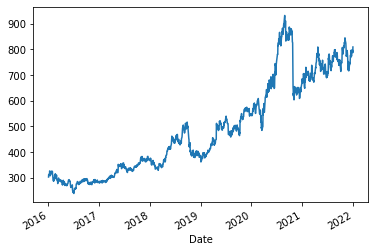

In [21]:
#Plot Adjusted Close Price
df['Close_Stock(BRL)'].plot()

In [23]:
#Set Target Variable
output_var = pd.DataFrame(df['Close_Stock(BRL)'])

#Selecting the Features
features = ['Close_Stock(EUR)','Close_EUR']

In [24]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Close_Stock(EUR),Close_EUR
Date,,
2016-01-04,0.073423,0.284297
2016-01-05,0.084411,0.306251
2016-01-06,0.092425,0.295288
2016-01-07,0.083247,0.295851
2016-01-08,0.079498,0.317911


In [32]:
#Splitting to Training set and Test set (Ratio: 80:20)
timesplit= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [33]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [34]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [35]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
181/181 [==============================] - 2s 3ms/step - loss: 257114.3125
Epoch 2/200
181/181 [==============================] - 0s 2ms/step - loss: 255050.0469
Epoch 3/200
181/181 [==============================] - 0s 2ms/step - loss: 250874.5312
Epoch 4/200
181/181 [==============================] - 0s 2ms/step - loss: 244226.4062
Epoch 5/200
181/181 [==============================] - 0s 3ms/step - loss: 235388.7344
Epoch 6/200
181/181 [==============================] - 0s 2ms/step - loss: 224851.8125
Epoch 7/200
181/181 [==============================] - 0s 2ms/step - loss: 213073.1562
Epoch 8/200
181/181 [==============================] - 0s 2ms/step - loss: 200423.7031
Epoch 9/200
181/181 [==============================] - 0s 2ms/step - loss: 187199.5156
Epoch 10/200
181/181 [==============================] - 0s 2ms/step - loss: 173643.3281
Epoch 11/200
181/181 [==============================] - 0s 2ms/step - loss: 159959.9688
Epoch 12/200
181/181 [===================

In [36]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

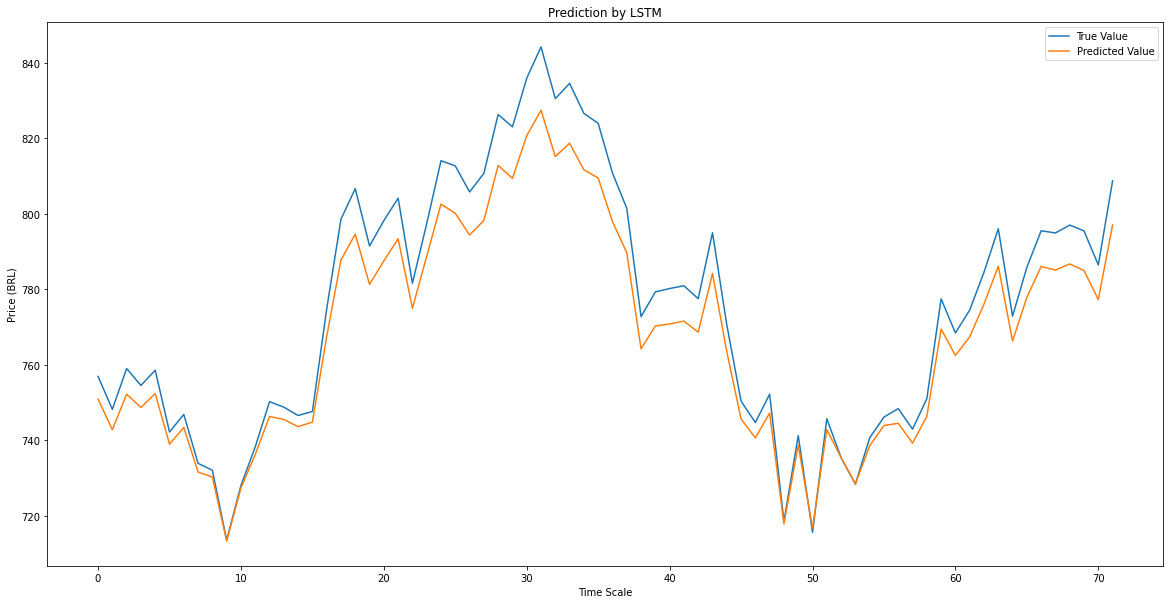

In [45]:
#Predicted x True Adj Close Value – LSTM
plt.figure(figsize = (20,10))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Price (BRL)')
plt.legend()
plt.show()

In [44]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mape = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(mse)
print(rmse)
print(mape)
print(r2)

76.004655818847
8.718064912516251
7.523170033042975
0.9286008350477047
